In [2]:
import pandas as pd
import os

In [3]:
def list_csv_files(directory):
    # List to hold csv file names
    csv_files = []
    
    # Iterate over files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a CSV
        if filename.endswith('.csv'):
            csv_files.append(filename)
    
    return csv_files


folder_path = '/Users/rachels/Desktop/NUS/Y4/dsa4266/Phishing data'
csv_files = list_csv_files("/Users/rachels/Desktop/NUS/Y4/dsa4266/Phishing data")
csv_files

['Nazario_5.csv',
 'Nigerian_Fraud.csv',
 'Ling.csv',
 'TREC_05.csv',
 'TREC_06.csv',
 'TREC_07.csv',
 'Nazario.csv',
 'SpamAssasin.csv',
 'CEAS_08.csv',
 'Nigerian_5.csv',
 'Enron.csv']

In [4]:
for file in csv_files:
    if 'TREC' in file:
        continue
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    print(file)
    print(df.shape)
    print(df.columns)
    # print(df.head(1))

Nazario_5.csv
(3065, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'], dtype='object')
Nigerian_Fraud.csv
(3332, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label'], dtype='object')
Ling.csv
(2859, 3)
Index(['subject', 'body', 'label'], dtype='object')
Nazario.csv
(1565, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label'], dtype='object')
SpamAssasin.csv
(5809, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'], dtype='object')
CEAS_08.csv
(39154, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'], dtype='object')
Nigerian_5.csv
(6331, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'], dtype='object')


/var/folders/r7/7xn5t9gj65x3tw58b7rmvtmm0000gn/T/ipykernel_13860/4199423972.py:5: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

Enron.csv
(49152, 423)
Index(['subject', 'body', 'label', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 413', 'Unnamed: 414', 'Unnamed: 415', 'Unnamed: 416',
       'Unnamed: 417', 'Unnamed: 418', 'Unnamed: 419', 'Unnamed: 420',
       'Unnamed: 421', 'Unnamed: 422'],
      dtype='object', length=423)


In [5]:
# combine all the datasets into one
combined = []
for file in csv_files:
    if 'TREC' in file:
        continue
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    if df.shape[1] == 7:
        df = df[['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label']]
        combined.append(df)

df = pd.read_csv(os.path.join(folder_path, 'TREC_07.csv')) 
df = df[['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label']]
combined.append(df)
combined_df = pd.concat(combined, ignore_index=True)

/var/folders/r7/7xn5t9gj65x3tw58b7rmvtmm0000gn/T/ipykernel_13860/1916306475.py:7: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

In [6]:
combined_df = pd.concat(combined, ignore_index=True)
combined_df.head()
combined_df.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label'], dtype='object')

## Start from here

In [1]:
import pandas as pd
df = pd.read_csv("~/Desktop/NUS/Y4/DSA4266/Phishing data/combined_data.csv",  lineterminator='\n')
df.head()

,sender,receiver,date,subject,body,urls,label,date_day_of_month,date_month,date_day_of_week,...,body_question_count,body_special_char_count,body_sentiment_polarity,body_sentiment_subjectivity,body_url_count,body_shortened_url_count,body_spam_count,send_word_count,send_char_count,send_diffSenderReceiver
0,"""Hu, Sylvia"" <Sylvia.Hu@ENRON.com>","""Acevedo, Felecia"" <Felecia.Acevedo@ENRON.com>...",2001-06-29 13:36:09+00:00,"FW: June 29 -- BNA, Inc. Daily Labor Report",User ID: enrondlr\nPW: bnaweb22\n\n\n ...,1,0,1.725612,-0.235795,0.845494,...,-0.148146,0.016733,-0.430243,-0.108630,5.465202,-0.033873,1.198552,0.12592,-0.467380,0
1,"""Webb, Jay"" <Jay.Webb@ENRON.com>","""Lambie, Chris"" <Chris.Lambie@ENRON.com>",2001-06-29 14:37:04+00:00,NGX failover plan.,"\nHi Chris, \n\nTonight we are rolling out a ...",0,0,1.725612,-0.235795,0.845494,...,-0.148146,-0.033274,-0.373288,-0.267096,-0.231379,-0.033873,-0.095955,0.12592,-0.657927,0
2,"""Symms, Mark"" <Mark.Symms@ENRON.com>","""Thomas, Paul D."" <Paul.D.Thomas@ENRON.com>",2001-06-29 13:39:30+00:00,RE: Intranet Site,Rika r these new?\n\n -----Original Message---...,1,0,1.725612,-0.235795,0.845494,...,-0.047293,-0.033274,-0.425876,-0.764598,0.185444,-0.033873,-0.239789,0.12592,-0.276833,0
3,"""Thorne, Judy"" <Judy.Thorne@ENRON.com>","""Grass, John"" <John.Grass@ENRON.com>, ""Nemec, ...",2001-06-29 15:35:17+00:00,FW: ENA Upstream Company information,"John/Gerald,\n\nWe are currently trading under...",0,0,1.725612,-0.235795,0.845494,...,-0.047293,-0.014521,-0.380623,-0.277870,-0.231379,-0.033873,0.191713,0.12592,-0.086286,0
4,"""Williams, Jason R (Credit)"" <Jason.R.Williams...","""Nemec, Gerald"" <Gerald.Nemec@ENRON.com>, ""Dic...",2001-06-29 15:40:02+00:00,New Master Physical,Gerald and Stacy -\n\nAttached is a worksheet ...,0,0,1.725612,-0.235795,0.845494,...,-0.148146,-0.033274,-0.029388,-0.615755,-0.231379,-0.033873,-0.239789,2.48685,1.723908,0


In [6]:
df.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label',
       'date_day_of_month', 'date_month', 'date_day_of_week',
       'date_hour_of_day', 'date_is_weekend', 'date_is_business_hours',
       'subj_reply', 'subj_forward', 'subj_word_count', 'subj_char_count',
       'body_char_count', 'body_word_count', 'body_distinct_word_count',
       'body_average_word_length', 'body_uppercase_word_count',
       'body_numeric_char_count', 'body_exclamation_count',
       'body_question_count', 'body_special_char_count',
       'body_sentiment_polarity', 'body_sentiment_subjectivity',
       'body_url_count', 'body_shortened_url_count', 'body_spam_count',
       'send_word_count', 'send_char_count', 'send_diffSenderReceiver'],
      dtype='object')

### Autoencoder

In [18]:
from sklearn.model_selection import train_test_split
# Step 3: Split the dataset into training and testing sets
X = df.drop(columns=['label', 'sender', 'receiver', 'date', 'subject', 'body'])  # Features
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - loss: 1.1464 - val_loss: 0.9639
Epoch 2/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 0.9690 - val_loss: 0.8442
Epoch 3/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 0.7332 - val_loss: 0.7866
Epoch 4/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 0.7827 - val_loss: 0.7557
Epoch 5/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.8662 - val_loss: 0.7392
Epoch 6/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 0.5632 - val_loss: 0.7308
Epoch 7/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.4621 - val_loss: 0.7280
Epoch 8/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 0.8213 - val_loss: 0.7224
Epoch 9/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.5954 - val_loss: 0.7214
Epoch 10/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 0.6821 - val_loss: 0.7205
Epoch 11/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - loss: 0.6918 - val_loss: 0.7202
Epoch 1

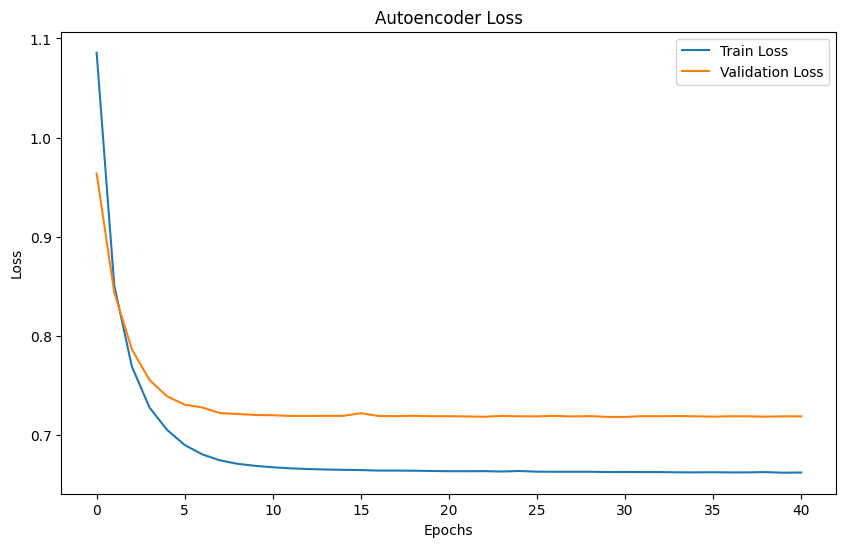

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization


# Step 4: Build the Autoencoder model
input_dim = X_train.shape[1]  # Number of features

# Define the encoder with L2 regularization and Dropout
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(input_layer)
encoded = BatchNormalization()(encoded)  # Add batch normalization
encoded = Dropout(0.3)(encoded)

encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(encoded)
encoded = BatchNormalization()(encoded)  # Add batch normalization
encoded = Dropout(0.3)(encoded)

latent_space = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(encoded)
latent_space = BatchNormalization()(latent_space)  # Add batch normalization

# Define the decoder with Batch Normalization and Dropout
decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(latent_space)
decoded = BatchNormalization()(decoded)  # Add batch normalization
decoded = Dropout(0.3)(decoded)

decoded = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(decoded)
decoded = BatchNormalization()(decoded)  # Add batch normalization

output_layer = Dense(input_dim, activation='sigmoid')(decoded)

# Define the autoencoder model
autoencoder = Model(input_layer, output_layer)

# Compile the model with Mean Squared Error loss and Adam optimizer
autoencoder.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation split
history = autoencoder.fit(X_train, X_train,
                          epochs=100,
                          batch_size=32,
                          validation_split=0.2,
                          callbacks=[early_stopping])

# Evaluate the model
# autoencoder.evaluate(X_test, X_test)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1075/1075 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Reconstruction Error: 109778    0.108031
50207     0.062331
42265     0.558369
77072     0.172638
126398    0.350862
            ...   
86877     0.162446
137542    0.729633
54684     0.326859
97871     0.457862
51157     0.091865
Length: 34393, dtype: float64
Accuracy: 0.5228971011543047
Precision: 0.40406976744186046
Recall: 0.04322408109957087
ROC-AUC: 0.4936279846362766
Confusion Matrix:
[[17289  1025]
 [15384   695]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.94      0.68     18314
           1       0.40      0.04      0.08     16079

    accuracy                           0.52     34393
   macro avg       0.47      0.49      0.38     34393
weighted avg       0.47      0.52      0.40     34393



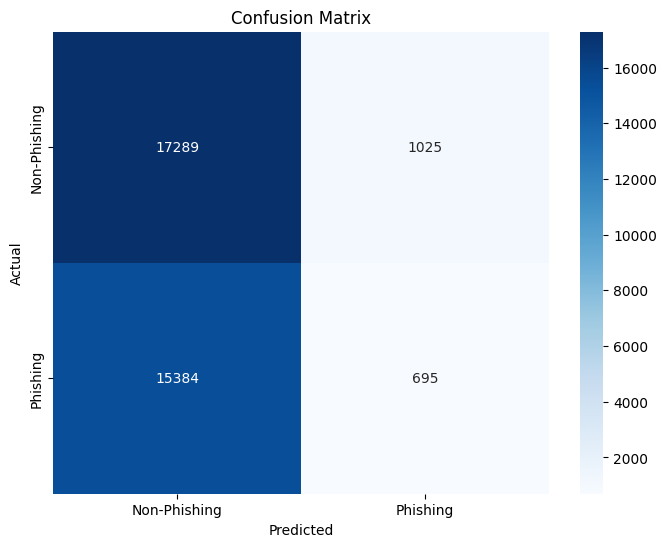

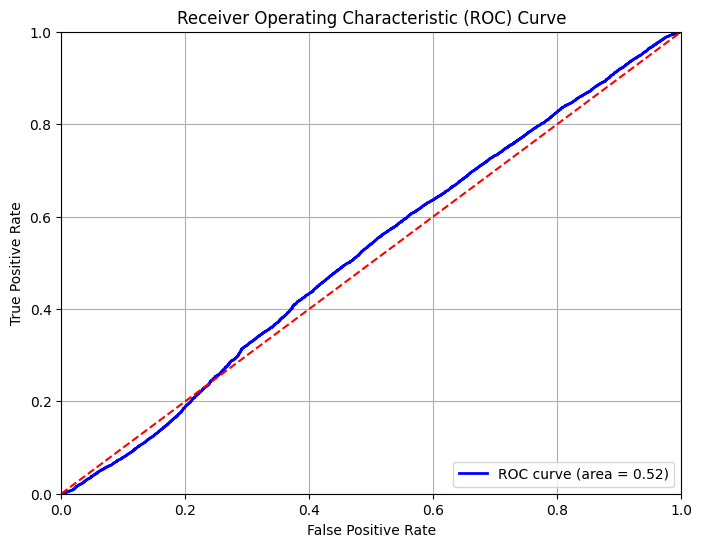

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score,precision_score,  recall_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_metrics(model, X_test, y_test):
    # Predict using the autoencoder
    encoded_data = model.predict(X_test)
    reconstruction_error = np.mean(np.square(X_test - encoded_data), axis=1)

    # Print reconstruction error statistics
    print(f'Reconstruction Error: {reconstruction_error}')

    # Set a threshold based on the 90th percentile
    threshold = np.percentile(reconstruction_error, 95)

    # Classify emails based on reconstruction error
    predictions = [1 if error > threshold else 0 for error in reconstruction_error]

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

    # Print the evaluation metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'ROC-AUC: {roc_auc}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report)

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Phishing', 'Phishing'], 
                yticklabels=['Non-Phishing', 'Phishing'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, reconstruction_error)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Call the function with your model, test data, and labels
evaluate_metrics(autoencoder, X_test, y_test)


5374/5374 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


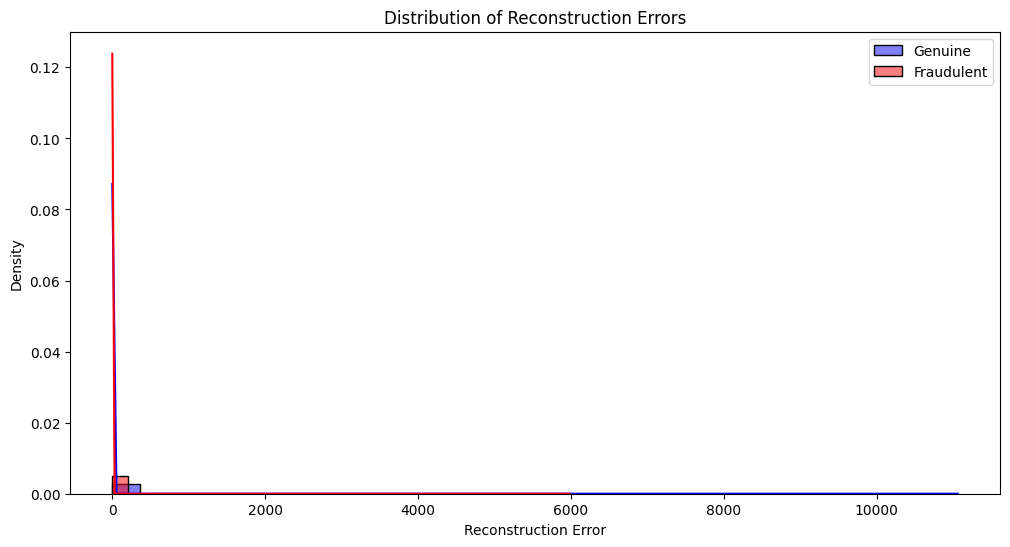

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
reconstruction_all = autoencoder.predict(X)  # X_all is your entire dataset
reconstruction_errors = np.mean(np.square(X - reconstruction_all), axis=1)

errors_genuine = reconstruction_errors[y == 0] 
errors_fraudulent = reconstruction_errors[y == 1] 

plt.figure(figsize=(12, 6))
sns.histplot(errors_genuine, color='blue', label='Genuine', kde=True, stat="density", bins=30)
sns.histplot(errors_fraudulent, color='red', label='Fraudulent', kde=True, stat="density", bins=30)
plt.title('Distribution of Reconstruction Errors')
plt.xlabel('Reconstruction Error')
plt.ylabel('Density')
plt.legend()
plt.show()


### Tuning the Autoencoder

Trial 50 Complete [08h 16m 10s]
val_loss: 0.7209487954775492

Best val_loss So Far: 0.7132311860720316
Total elapsed time: 3d 14h 22m 40s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 39 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters:
{'activation1': 'tanh', 'activation2': 'relu', 'activation3': 'relu', 'units1': 128, 'l2_reg': 0.0003239908128087573, 'dropout1': 0.2, 'units2': 128, 'l2_reg2': 2.0641106231897107e-05, 'dropout2': 0.2, 'units3': 256, 'l2_reg3': 1.6710045570960692e-05, 'dropout3': 0.30000000000000004, 'learning_rate': 3.1682521089350386e-05, 'optimizer': 'nadam'}
Epoch 1/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.5308 - val_loss: 0.7130
Epoch 2/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.6631 - val_loss: 0.7129
Epoch 3/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.5068 - val_loss: 0.7129
Epoch 4/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.6358 - val_loss: 0.7127
Epoch 5/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.6271 - val_loss: 0.7127
Epoch 6/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.6943 - val_loss: 0.7125
Epoch 7/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 0.7072 - val_loss: 0.7125


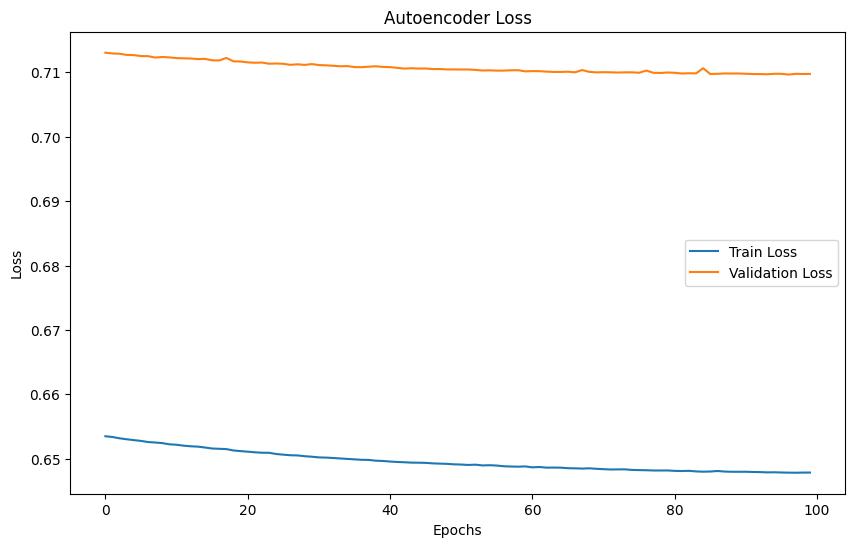

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from keras.layers import BatchNormalization
from kerastuner import HyperModel, RandomSearch

# Step 1: Define a HyperModel class
class AutoencoderHyperModel(HyperModel):
    def build(self, hp):
        input_dim = X_train.shape[1]  # Number of features
        
        # Define the encoder
        input_layer = Input(shape=(input_dim,))
        
        # Using only 'relu' activation function for all layers
        encoded = Dense(units=hp.Int('units1', min_value=64, max_value=256, step=64),
                        activation='relu',
                        kernel_regularizer=l2(hp.Float('l2_reg', 1e-5, 1e-2, sampling='LOG')))(input_layer)
        encoded = BatchNormalization()(encoded)  # Add batch normalization
        encoded = Dropout(hp.Float('dropout1', 0.2, 0.5, step=0.1))(encoded)

        encoded = Dense(units=hp.Int('units2', min_value=32, max_value=128, step=32),
                        activation='relu',
                        kernel_regularizer=l2(hp.Float('l2_reg2', 1e-5, 1e-2, sampling='LOG')))(encoded)
        encoded = BatchNormalization()(encoded)  # Add batch normalization
        encoded = Dropout(hp.Float('dropout2', 0.2, 0.5, step=0.1))(encoded)

        latent_space = Dense(units=32, activation='relu', kernel_regularizer=l2(0.001))(encoded)
        latent_space = BatchNormalization()(latent_space)  # Add batch normalization

        # Define the decoder
        decoded = Dense(units=hp.Int('units3', min_value=64, max_value=256, step=64),
                        activation='relu',
                        kernel_regularizer=l2(hp.Float('l2_reg3', 1e-5, 1e-2, sampling='LOG')))(latent_space)
        decoded = BatchNormalization()(decoded)  # Add batch normalization
        decoded = Dropout(hp.Float('dropout3', 0.2, 0.5, step=0.1))(decoded)

        decoded = Dense(units=input_dim, activation='sigmoid')(decoded)

        # Define the autoencoder model
        autoencoder = Model(input_layer, decoded)

        # Compile the model
        # Hyperparameter: Optimizer Choice
        optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'nadam'])

        # Hyperparameter: Learning Rate
        learning_rate = hp.Float('learning_rate', 1e-5, 1e-2, sampling='log')

        # Select Optimizer with the specified Learning Rate
        optimizer = None
        if optimizer_choice == 'adam':
            optimizer = Adam(learning_rate=learning_rate)
        elif optimizer_choice == 'rmsprop':
            optimizer = RMSprop(learning_rate=learning_rate)
        elif optimizer_choice == 'nadam':
            optimizer = Nadam(learning_rate=learning_rate)
        else:
            raise ValueError("Unsupported optimizer type")

        # Compile the model
        autoencoder.compile(optimizer=optimizer, loss='mse')
        # autoencoder.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-5, 1e-2, sampling='LOG')), loss='mse')
        
        return autoencoder

# Step 2: Set up Keras Tuner
hypermodel = AutoencoderHyperModel()

tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=20,  # Number of different hyperparameter configurations to try
    executions_per_trial=3,
    directory='autoencoder_tuning',
    project_name='autoencoder_hyperparameter_tuning'
)

# Step 3: Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 4: Start the hyperparameter tuning process
tuner.search(X_train, X_train,
             epochs=50,
             batch_size=32,
             validation_split=0.2,
             callbacks=[early_stopping])

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_hyperparameters.values)

# Step 5: Fit the best model on the entire training data
history_tuned = best_model.fit(X_train, X_train,
                          epochs=100,
                          batch_size=32,
                          validation_split=0.2,
                          callbacks=[early_stopping])

# Step 6: Evaluate the model on the testing set
test_loss = best_model.evaluate(X_test, X_test)
print(f'Test Loss: {test_loss}')

# Optional: Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_tuned.history['loss'], label='Train Loss')
plt.plot(history_tuned.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# best_model.save('best_autoencoder_model.h5')  # Save the model to a file

In [41]:
import matplotlib.pyplot as plt

def plot_loss_curve(history):
    # Plot the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve of the Model')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# plot_loss_curve(history_tuned)

In [44]:
print("Best Hyperparameters:")
print(best_hyperparameters.values)

Best Hyperparameters:
{'activation1': 'sigmoid', 'activation2': 'sigmoid', 'activation3': 'sigmoid', 'units1': 128, 'l2_reg': 0.005254388923785788, 'dropout1': 0.2, 'units2': 128, 'l2_reg2': 1.606120839072308e-05, 'dropout2': 0.30000000000000004, 'units3': 256, 'l2_reg3': 0.0013763964486821528, 'dropout3': 0.2, 'learning_rate': 3.3825960685398456e-05}


Evaluate Model

1075/1075 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Reconstruction Error: 109778    0.105523
50207     0.060794
42265     0.558296
77072     0.161426
126398    0.348559
            ...   
86877     0.155620
137542    0.726349
54684     0.304319
97871     0.455685
51157     0.091911
Length: 34393, dtype: float64
Accuracy: 0.5232460093623702
ROC-AUC: 0.4939783725113993
Confusion Matrix:
[[17295  1019]
 [15378   701]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.94      0.68     18314
           1       0.41      0.04      0.08     16079

    accuracy                           0.52     34393
   macro avg       0.47      0.49      0.38     34393
weighted avg       0.47      0.52      0.40     34393



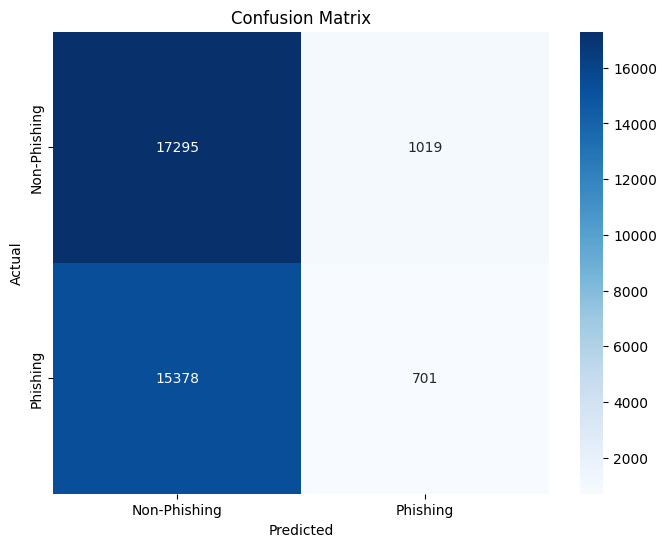

In [48]:
evaluate_metrics(best_model, X_test)